<a href="https://colab.research.google.com/github/Samoh63/Machine-Learning/blob/main/IRIS_MLP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import normalize, MinMaxScaler
import matplotlib.pyplot as plt
import plotly.express as px

import tensorflow as tf
from tensorflow import keras
from keras import layers
from keras.models import Sequential



In [2]:
iris = datasets.load_iris()
type(iris)
df = pd.DataFrame(iris.data)
df['target'] = pd.DataFrame(iris.target)
df.columns = ['sepal_width', 'sepal_length', 'petal_width', 'petal_length', 'target']
df
fig = px.parallel_coordinates(df , color="target")
fig.show()

In [3]:
X = df.drop("target", axis=1) 
y = df["target"] 
y

0      0
1      0
2      0
3      0
4      0
      ..
145    2
146    2
147    2
148    2
149    2
Name: target, Length: 150, dtype: int64

In [4]:
# X = iris.data
# y = iris.target
# y

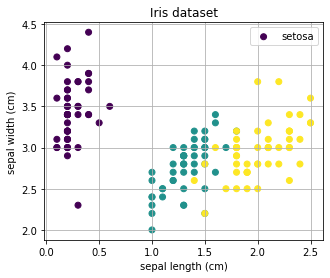

In [5]:
color = iris.target_names
plt.figure(figsize=(5,4))
plt.scatter(X['petal_length'], X['sepal_length'], c=y)
plt.xlabel(iris.feature_names[0])
plt.ylabel(iris.feature_names[1])
plt.legend(iris.target_names, loc='upper right')
plt.title('Iris dataset')
plt.legend(['setosa', 'versicolor', 'virginica'])
plt.grid()


In [6]:
scalar = MinMaxScaler()
xn = scalar.fit_transform(X)

# if variable y is a binary categorical variable with values 0 and 1 and there are 25% of zeros and 75% of ones, 
# stratify=y will make sure that your random split has 25% of 0's and 75% of 1's.
xTrain, xTest, yTrain, yTest = train_test_split(xn, y, test_size=0.2, random_state=42, stratify=y)
print(np.bincount(yTrain))
print(np.bincount(yTest))


# One hot encoding (dummy variabels): One hot encoding is a process by which categorical variables are converted into a form that could be provided to ML algorithm
# to do a better job in prediction

yTrainCat = tf.keras.utils.to_categorical(yTrain)
yTestCat = tf.keras.utils.to_categorical(yTest)



[40 40 40]
[10 10 10]


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 32)                160       
                                                                 
 dense_1 (Dense)             (None, 16)                528       
                                                                 
 dense_2 (Dense)             (None, 3)                 51        
                                                                 
Total params: 739
Trainable params: 739
Non-trainable params: 0
_________________________________________________________________


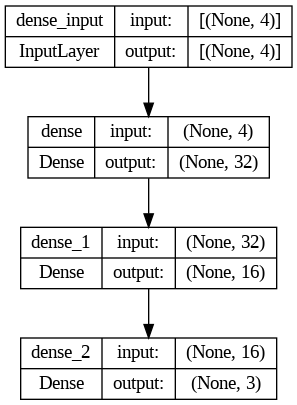

In [7]:
model = Sequential([
    layers.Dense(32, activation='relu', input_shape=[4]),
    layers.Dense(16, activation='relu'),
    layers.Dense(3, activation ='softmax')   #  By default, activation function is set to None. That means that by default it is a linear activation.
])


# adam: Adaaptive Moment estimation
#  It uses a different learning rates for every single parameter of your model.
model.compile(optimizer='adam', loss='CategoricalCrossentropy', metrics=['accuracy']) 


#visualize your model
model.summary()
dot_img_file = '/tmp/model_1.png'
tf.keras.utils.plot_model(model, to_file=dot_img_file, show_shapes=True)

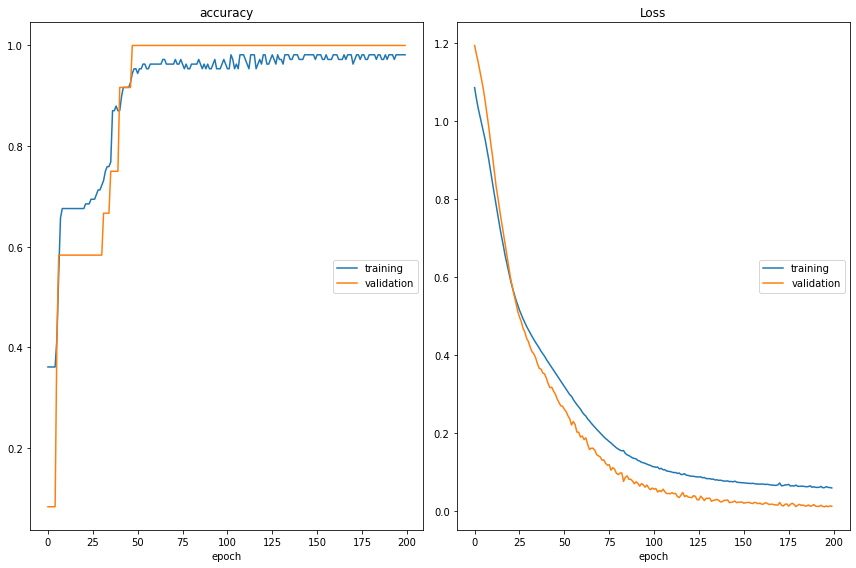

accuracy
	training         	 (min:    0.361, max:    0.981, cur:    0.981)
	validation       	 (min:    0.083, max:    1.000, cur:    1.000)
Loss
	training         	 (min:    0.059, max:    1.085, cur:    0.059)
	validation       	 (min:    0.011, max:    1.194, cur:    0.012)
7/7 [==============================] - 0s 77ms/step - loss: 0.0588 - accuracy: 0.9815 - val_loss: 0.0119 - val_accuracy: 1.0000


In [8]:
!pip install livelossplot
from livelossplot import PlotLossesKeras
######################################################################################
# batch_size:

#imagine that we have 3000 samples and 32 batch_size. To go through all 3000 samples, it takes 94 (3000/32) iteration-> 1 epoch
#              it means it takes 94 iterations to finish one epoch
# smaller batches mean each step in gradient descent may be less accurate, so it may take longer for the algorithm to cnverge. But, it has been observed that for larger
# batches, there is a significant degradation in the quality of the model, as measured by its ability to generalize
# Batch size of 32 or 64 is a good starting point.

# Summary: 
# Larger batch sizes result in faster progress in training, but don't always converge as fast. Smaller batch sizes train slower, but can converge faster
######################################################################################
# Epoch: the number of times we want the model to see the entire dataset
######################################################################################
#  Verbose :
# 'auto', 0, 1, or 2. Verbosity mode. 0 = silent, 1 = progress bar, 2 = one line per epoch. 'auto' defaults to 1 for most cases, 
#  but 2 when used with ParameterServerStrategy. Note that the progress bar is not particularly useful when logged to a file, 
#  so verbose=2 is recommended when not running interactively (eg, in a production environment).
# 

epochs = 200
history = model.fit(xTrain, yTrainCat, epochs = epochs, validation_split=0.1, batch_size = 16, callbacks=[PlotLossesKeras()], verbose=1)

In [9]:
# The outputs of fitting model
print(history.history.keys())

# List of function in this class
print(dir(history.history))

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])
['__class__', '__contains__', '__delattr__', '__delitem__', '__dir__', '__doc__', '__eq__', '__format__', '__ge__', '__getattribute__', '__getitem__', '__gt__', '__hash__', '__init__', '__init_subclass__', '__iter__', '__le__', '__len__', '__lt__', '__ne__', '__new__', '__reduce__', '__reduce_ex__', '__repr__', '__reversed__', '__setattr__', '__setitem__', '__sizeof__', '__str__', '__subclasshook__', 'clear', 'copy', 'fromkeys', 'get', 'items', 'keys', 'pop', 'popitem', 'setdefault', 'update', 'values']


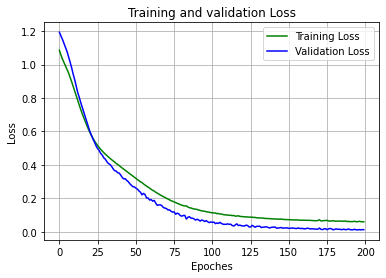

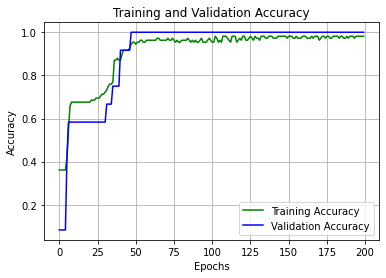

In [10]:
train_loss = history.history['loss']
val_loss = history.history['val_loss']
epo = range(0,epochs)
plt.plot(epo, train_loss, 'g', label='Training Loss')
plt.plot(epo, val_loss, 'b', label='Validation Loss')
plt.title('Training and validation Loss')
plt.xlabel('Epoches')
plt.ylabel('Loss')
plt.legend()
plt.grid()
plt.show()


train_acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
plt.plot(epo, train_acc, 'g', label='Training Accuracy')
plt.plot(epo, val_acc, 'b', label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid()

In [11]:
from sklearn.metrics import confusion_matrix
ypred=model.predict(xTest)
print(ypred[:10,:])
# convert outputs into one hot encoding
ypred= np.argmax(ypred, axis=1)  #.numpy()
print(ypred.shape)
print(ypred)
confusion_matrix(yTest, ypred)

1/1 [==============================] - 0s 181ms/step
[[9.9873191e-01 1.2679342e-03 6.1750782e-08]
 [6.8561385e-05 2.4216868e-01 7.5776273e-01]
 [2.3409609e-02 9.7429502e-01 2.2954221e-03]
 [1.4364055e-02 9.8322260e-01 2.4132573e-03]
 [9.9921244e-01 7.8753836e-04 2.8662233e-08]
 [3.2111557e-04 9.3236595e-01 6.7313001e-02]
 [9.9974227e-01 2.5773869e-04 3.1766751e-09]
 [9.9888957e-01 1.1105262e-03 1.2059804e-08]
 [2.7705482e-06 2.2136293e-02 9.7786081e-01]
 [1.0178612e-03 9.5003539e-01 4.8946764e-02]]
(30,)
[0 2 1 1 0 1 0 0 2 1 2 2 2 1 0 0 0 1 1 2 0 2 1 2 2 2 1 0 2 0]


array([[10,  0,  0],
       [ 0,  9,  1],
       [ 0,  0, 10]])